In [1]:
import warnings
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
sys.path.append("C:/dev/pycmqlib/")
sys.path.append("C:/dev/pycmqlib/scripts/")

import misc
import data_handler as dh
import plotly_examples
import backtest
%matplotlib inline

In [2]:
start = datetime.date(2015, 1, 1)
end = datetime.date(2020, 1, 17)
need_shift = 1
asset = 'j'
freq = 'd'
args = {'n': 1, 'roll_rule': '-35b', 'freq': freq, 'need_shift': need_shift}
args['start_date'] = start
args['end_date'] = end
df = misc.nearby(asset, **args)

df.index = pd.to_datetime(df.index)
#trace = go.Scatter(x=list(df.index),
#                   y=list(df.high))
win_s = 10
win_l = 40
df['MA1'] = dh.MA(df, n = win_s)
df['MA2'] = dh.MA(df, n = win_l)

def zoom(layout, xrange):
    in_view = df.loc[fig.layout.xaxis.range[0]:fig.layout.xaxis.range[1]]
    fig.layout.yaxis.range = [in_view.low.min(), in_view.high.max()]

win_s = 10
win_l = 40
df['MA1'] = dh.MA(df, n = win_s)
df['MA2'] = dh.MA(df, n = win_l)

fig = plotly_examples.plot_ohlc_with_indicators(df, ind_fields = ['MA1', 'MA2'])
fig.layout.on_change(zoom, 'xaxis.range')
fig

RmlndXJlV2lkZ2V0KHsKICAgICdkYXRhJzogW3snY2xvc2UnOiBhcnJheShbICA5NC4gLCAgMTE3LiAsICAxMTkuICwgLi4uLCAxODUyLjUsIDE4NTcuNSwgMTg3NS4gXSksCiAgICAgICAgICDigKY=


In [56]:
start = datetime.date(2016, 1, 1)
end = datetime.date(2020, 1, 17)
need_shift = 1
asset = 'j'
freq = 'm'
args = {'n': 1, 'roll_rule': '-35b', 'freq': freq, 'need_shift': need_shift}
args['start_date'] = start
args['end_date'] = end
mdf = misc.nearby(asset, **args)
mdf = misc.cleanup_mindata(mdf, asset)
print mdf[-5:]


                    instID exch        date  min_id    open    high     low  \
datetime                                                                      
2020-01-17 14:55:00  j2005  DCE  2020-01-17    2055  1877.5  1877.5  1874.5   
2020-01-17 14:56:00  j2005  DCE  2020-01-17    2056  1875.5  1876.5  1875.0   
2020-01-17 14:57:00  j2005  DCE  2020-01-17    2057  1875.5  1876.0  1874.0   
2020-01-17 14:58:00  j2005  DCE  2020-01-17    2058  1874.5  1874.5  1873.5   
2020-01-17 14:59:00  j2005  DCE  2020-01-17    2059  1874.0  1875.0  1873.5   

                      close  volume  openInterest contract  shift  
datetime                                                           
2020-01-17 14:55:00  1876.0     598        128825    j2005    0.0  
2020-01-17 14:56:00  1875.5     288        128844    j2005    0.0  
2020-01-17 14:57:00  1874.0     524        128723    j2005    0.0  
2020-01-17 14:58:00  1874.0     626        128670    j2005    0.0  
2020-01-17 14:59:00  1875.0     958   

In [66]:
df = dh.conv_ohlc_freq1(mdf, '10m')
#df = mdf.copy()
#df = dh.day_split1(mdf, [300, 1500, 1930, 2100])

win_1 = 10
win_2 = 40
win_3 = 120
df['MA1'] = dh.MA(df, n = win_1)
df['MA2'] = dh.MA(df, n = win_2)
df['MA3'] = dh.MA(df, n = win_3)
#fig2 = plotly_examples.plot_ohlc_with_indicators(df, ind_fields = ['MA1', 'MA2', 'MA3'])
#fig2.layout.on_change(zoom, 'xaxis.range')
#fig2

C:\dev\anaconda2\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



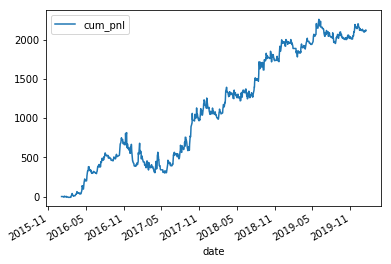

{'trade_std': 54.93250637853797, 'win_ratio': 0.376, 'win_std': 59.17828129770855, 'loss_25pct': -28.625, 'loss_75pct': -10.0, 'loss_mean': -21.73076923076923, 'trade_50pct': -7.5, 'win_50pct': 31.25, 'trade_max': 227.0, 'loss_sum': -3390.0, 'trade_75pct': 18.875, 'win_75pct': 95.125, 'win_max': 227.0, 'win_min': 0.5, 'win_sum': 5513.0, 'trade_sum': 2123.0, 'trade_count': 250.0, 'trade_min': -94.5, 'win_count': 94.0, 'trade_25pct': -21.75, 'win_25pct': 12.0, 'trade_mean': 8.492, 'win_mean': 58.648936170212764, 'loss_50pct': -17.25, 'loss_max': -0.5, 'loss_std': 17.360446758725164, 'loss_min': -94.5, 'loss_count': 156.0}
                              0
avg_pnl_1y             0.622449
avg_pnl_2y             2.151639
avg_pnl_3y             1.967940
avg_pnl_4y             2.179632
max_dd_period_1y     -80.000000
max_dd_period_2y     -80.000000
max_dd_period_3y     -80.000000
max_dd_period_4y    -184.000000
max_drawdown_1y     -308.500000
max_drawdown_2y     -308.500000
max_drawdown_3y     

In [67]:
margin_rate = [0.08, 0.08]
pnl_tenors = ['1y', '2y', '3y', '4y']
cost_ratio = 1.0
offset = 0.0
start_capital = 0.0

long_signal = pd.Series(np.nan, index = df.index)
long_flag = dh.CROSSOVER2(df['MA1'],  df['MA2'], direction = 1) & (df['MA2'] >= df['MA3'])
long_signal[long_flag] = 1
cover_flag = dh.CROSSOVER2(df['MA1'],  df['MA3'], direction = -1) 
long_signal[cover_flag] = 0
long_signal = long_signal.shift(1).fillna(method='ffill').fillna(0)
short_signal = pd.Series(np.nan, index = df.index)
short_flag = dh.CROSSOVER2(df['MA1'],  df['MA2'], direction = -1) & (df['MA2'] <= df['MA3'])
short_signal[short_flag] = -1
cover_flag = dh.CROSSOVER2(df['MA1'],  df['MA3'], direction = 1)
short_signal[cover_flag] = 0
short_signal = short_signal.shift(1).fillna(method='ffill').fillna(0)
df['pos'] = (long_signal + short_signal)
df['pos'][-1] = 0.0
df['cost'] = abs(df['pos'] - df['pos'].shift(1)) * offset
df['cost'] = df['cost'].fillna(0.0)
df['traded_price'] = df.open
closed_trades = backtest.simdf_to_trades1(df, slippage = offset)
res_trade = backtest.get_trade_stats(closed_trades)
(res_pnl, ts) = backtest.get_pnl_stats([df], margin_rate, 'm', tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
ts[['cum_pnl']].plot()
plt.show()
print res_trade
pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
print pnl_df